<a href="https://colab.research.google.com/github/jgp20/HCSPD2024/blob/main/Actividades_Clase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cálculo simbólico en Python**

---

En Python se puede resolver las ecuaciones diferenciales y las ecuaciones algebraicas necesarias para linealizar un proceso no lineal y diseñarle un controlador.

Para resolver un sistema de ecuaciones lineales donde $c_2(t)=\dot{c_1}(t)$ y $c_1(t)=\dot{c_2}(t)$, se puede resolver mediante la función dsolve().

In [ ]:
from sympy import *
import numpy as np
init_printing(use_unicode=True)
x, y, z, t, w,  V=symbols('x y z t omega V')
c1=Function('c1')
c2=Function('c2')
# hq=symbols('hbar',positive=True)
g1=Eq(c2(t),Derivative(c1(t),t))
# g1=c2==dif(c1,t)
g2=Eq(c1(t),Derivative(c2(t),t))
eq=(g1,g2)
res=dsolve(eq,hint='all',ics={c1(0):1,c2(0):0})
# pretty_print(res)
res

⎡         t    -t           t    -t⎤
⎢        ℯ    ℯ            ℯ    ℯ  ⎥
⎢c₁(t) = ── + ───, c₂(t) = ── - ───⎥
⎣        2     2           2     2 ⎦

# **Cicuito R-L-C**



#Solución analítica

R=1$\Omega$, L=1Hy, y C=1F.

Entrada de tensión escalón de 12V




In [ ]:
# SymPy es una biblioteca de Python para matemáticas simbólicas
from sympy import *
# "numpy", Soporte para crear vectores y matrices grandes multidimensionales,
# junto con una gran colección de funciones matemáticas de alto nivel para operar con ellas.
import numpy as np
init_printing(use_unicode=True)
R=L=C=1
Ve = 12  # Entrada de tensión escalón de 12 V
t = symbols('t')
Is=Function('Is')  # Corriente en circuito serie
Vc=Function('Vc')  # Tensión en capacitor
#g1=Eq(Is(t).diff(),-R/L*Is(t)-1/L*Vc(t)+1/L*12)
#g2=Eq(Vc(t).diff(),1/C*Is(t))
g1=Eq(Derivative(Is(t),t),-R/L*Is(t)-1/L*Vc(t)+1/L*Ve)
g2=Eq(Derivative(Vc(t),t),1/C*Is(t))
eq=(g1,g2)  # tuple
res=dsolve(eq,hint='all',ics={Is(0):0,Vc(0):0})
#pretty_print(res)
Corriente=simplify(res[0])
Tension=simplify(res[1])
display(Corriente,Tension)


                         -t           
                         ───          
                          2     ⎛√3⋅t⎞
Is(t) = 13.856406460551⋅ℯ   ⋅sin⎜────⎟
                                ⎝ 2  ⎠

                                -t               
                                ───              
                                 2     ⎛√3⋅t   π⎞
Vc(t) = 12.0 - 13.856406460551⋅ℯ   ⋅sin⎜──── + ─⎟
                                       ⎝ 2     3⎠

# Simulación

Circuito R-L-C

R=1Ω, L=1Hy, y C=1F.

Entrada de tensión escalón de 12V

a- Simulación 3 segundos, usando funciones analíticas

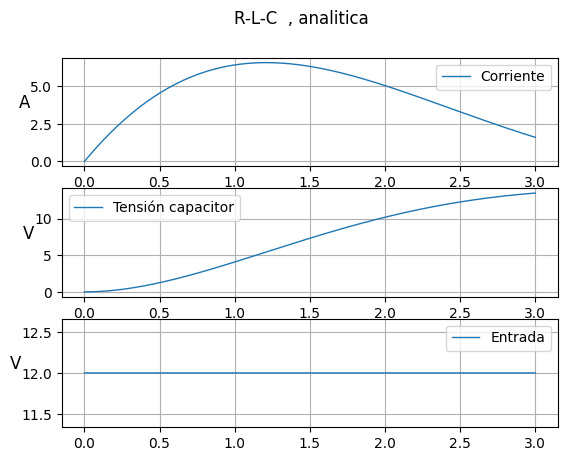

In [ ]:
import numpy as np
# La librería linalg que se encuentra en numpy se especializa en algebra lineal
# con matrices y vectores provistos por numpy.
from numpy.linalg import eig
# SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations,
# differential equations, statistics and many other classes of problems.
import scipy as sp
# The signal processing toolbox currently contains some filtering functions, a limited set of filter design tools,
# and a few B-spline interpolation algorithms for 1- and 2-D data.
import scipy.signal
# Matplotlib es una biblioteca para la generación de gráficos en dos dimensiones, a partir de datos contenidos en listas
# o arrays en el lenguaje de programación Python
from matplotlib import pyplot as plt
# la mayoría de los comandos de trazado en pylab tiene análogos
# Matlab con similares argumentos.
from pylab import *

h=1e-4;t_simul=3;

Ve=np.linspace(0,0,int(t_simul/h))
t=np.linspace(0,0,int(t_simul/h))
Is=np.linspace(0,0,int(t_simul/h))
Vc=np.linspace(0,0,int(t_simul/h))
for ii in range(int(t_simul/h)):
  Ve[ii] = 12
  t[ii] = ii*h
  Is[ii] = 13.856406460551 *exp(-t[ii]/2)*sin(t[ii]*sqrt(3)/2)
  Vc[ii] = 12- 13.856406460551 *exp(-t[ii]/2)*sin(t[ii]*sqrt(3)/2+pi/3)

fig, axs = plt.subplots(3,1)
fig.suptitle('R-L-C  , analitica')
axs[0].plot(t, Is, linewidth =1.0)
axs[0].legend(["Corriente"])
axs[0].grid( True )
axs[0].set_ylabel('A',rotation=0, fontsize=12)
axs[1].plot(t, Vc, linewidth =1.0)
axs[1].legend(["Tensión capacitor"])
axs[1].set_ylabel('V',rotation=0, fontsize=12)
axs[1].grid( True )
axs[2].plot(t, Ve, linewidth =1.0)
axs[2].legend(["Entrada"])
axs[2].set_ylabel('V',rotation=0, fontsize=12)
axs[2].grid( True )




Circuito R-L-C

R=1Ω, L=1Hy, y C=1F.

Entrada de tensión escalón de 12V

b- Simulación 3 segundos, empleando el cálculo mediante Euler

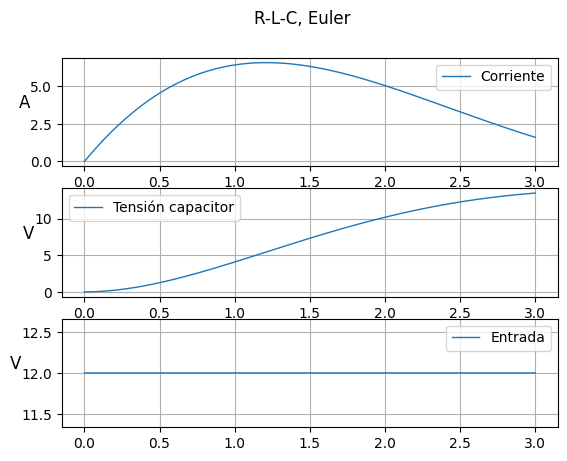

In [ ]:
#Funcion modelo
def modrlc(t_etapa, Xant, accion):
    h=1e-5
    R=1;L=1;C=1
    A=np.array([[-R/L, -1/L] , [1/C,0]])
    B=np.array([[1/L], [0]])
    # C=[R , 0]
    u=accion
    X=Xant
    for ii in range(int(t_etapa/h)):
      Xp= A @ X + B * u
      X= X + Xp * h

    return X

#
X=np.array([[0],[0]])
t_etapa=1e-4
tF=3;
u=12;
t=np.linspace(0,0,int(tF/t_etapa))
x1=np.linspace(0,0,int(tF/t_etapa)) # corriente
x2=np.linspace(0,0,int(tF/t_etapa)) # tensión en el capacitor
acc=np.linspace(0,0,int(tF/t_etapa)) # entrada 12 Vdc
for ii in range(int(tF/t_etapa)):
  x1[ii]= X[0][0]
  x2[ii]= X[1][0]
  t[ii] = ii*t_etapa
  X=modrlc(t_etapa, X, u);
  acc[ii]=u;

#Grafico
fig, axs = plt.subplots(3,1)
fig.suptitle('R-L-C, Euler')
axs[0].plot(t, x1, linewidth =1.0)
axs[0].legend(["Corriente"])
axs[0].grid( True )
axs[0].set_ylabel('A',rotation=0, fontsize=12)
axs[1].plot(t, x2, linewidth =1.0)
axs[1].legend(["Tensión capacitor"])
axs[1].set_ylabel('V',rotation=0, fontsize=12)
axs[1].grid( True )
axs[2].plot(t, acc, linewidth =1.0)
axs[2].legend(["Entrada"])
axs[2].set_ylabel('V',rotation=0, fontsize=12)
axs[2].grid( True )




# Simulación numérica de un avión en piloto automático

Esquema simplificado y en un punto de operación de un avión:

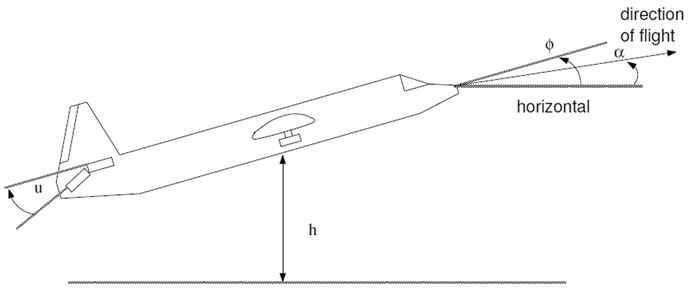

Para el caso de la figura, modelo válido sólo para pequeños ángulos, se tiene las ecuaciones
<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
\ \dot{\alpha}(t)=a(\phi(t) -\alpha(t))  \\
\ \ddot{\phi}(t) = -\omega ^2 (\phi (t)-\alpha (t) -b \cdot u(t)) \\
\ \dot{h}(t)=c \cdot \alpha (t)
\end{cases}
\end{equation*} \tag*{}$

donde $\omega >0$ al igual que $a$ y $b$.

donde $\omega$>0 representa la frecuencia natural, y los coeficientes a b son constantes positivas, u es la variable manipulada y es proporcional a la posición de los elevadores,$\phi$
 (ángulo de cabeceo) en radianes, vuela a c metros por segundo, su trayectoria de
vuelo forma un ángulo $\alpha$ con la horizontal (si $\alpha$>0 sube, si $\alpha$<0 desciende) Elegir x1=$\alpha$, x2=$\phi$, x3=$\dot\phi$ y x4=h.

$\begin{equation*}
\begin{cases}
\ \dot{x1}(t)=a(x2(t) -x1(t))  \\
\ \dot{x2}(t) = x3 \\
\ \dot{x3}(t) = -\omega ^2 (x2 (t)- x1(t) -b \cdot u(t)) \\
\ \dot{x4}(t)=c \cdot x1(t)
\end{cases}
\end{equation*}$

$\dot{x}$ = A x + B u

A = [ [-a , a , 0 , 0] , [0 , 0 , 1 , 0] , [w^2 , -w^2 , 0 , 0] , [c , 0 , 0 , 0] ]

B = [ [0] , [0] , [w^2*b] , [0]]



# SOLUCION NUMERICA
$\omega$=0,2; a=0,01; b=2; c=100 m/s, (es decir, 360Km/h),
$\Delta$t=$10^{-3}$; y el tiempo de simulación de 5 segundos

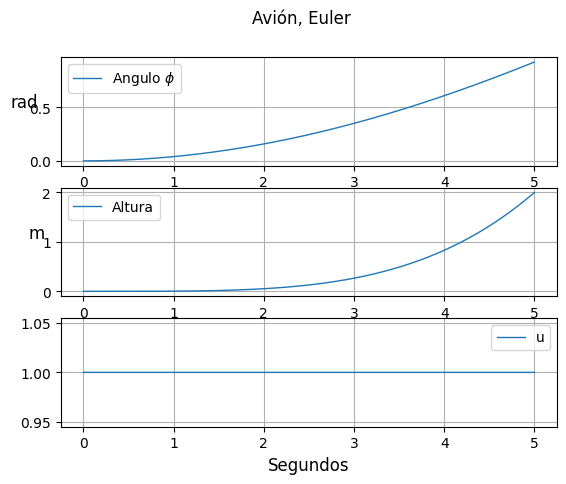

In [ ]:
#Funcion modelo avión
def modavion(t_etapa, Xant, accion):
  # Xant=[alfa,fi,fi_p,h] -> [x1,x2,x3,x4]
  a=0.01; b=2; c=100
  omega=0.2
  h=1e-4
  u=accion
  X=Xant
  A = np.array([ [-a , a , 0 , 0] ,[ 0 , 0 , 1 , 0] , [omega**2 , -omega**2 , 0 , 0] , [c , 0 , 0 , 0] ])
  B = np.array([ [0] ,[0] , [omega**2*b] , [0]])
  for ii in range(int(t_etapa/h)):
    Xp = A @ X + B * u;
    X = X + Xp * h;

  return X

X=np.array([[0],[0],[0],[0]])
t_etapa=1e-3 #10^(-3)
tF=5 #Segundos
t=np.linspace(0,0,int(tF/t_etapa))
x2=np.linspace(0,0,int(tF/t_etapa))
x4=np.linspace(0,0,int(tF/t_etapa))
acc=np.linspace(0,0,int(tF/t_etapa))
u=1
for ii in range(int(tF/t_etapa)):
  x2[ii]=X[1][0]  # Ángulo fi
  x4[ii]=X[3][0]  # Altura del avión, con respecto altura crucero
  t[ii] = ii * t_etapa
  X=modavion(t_etapa, X, u)
  acc[ii]=u

#Grafico
fig, axs = plt.subplots(3,1)
fig.suptitle('Avión, Euler')
axs[0].plot(t, x2, linewidth =1.0)
axs[0].legend(["Angulo $\phi$"])
axs[0].grid( True )
axs[0].set_ylabel('rad',rotation=0, fontsize=12)
axs[1].plot(t, x4, linewidth =1.0)
axs[1].legend(["Altura"])
axs[1].set_ylabel('m',rotation=0, fontsize=12)
axs[1].grid( True )
axs[2].plot(t, acc, linewidth =1.0)
axs[2].legend(["u"])
#axs[2].set_ylabel('V',rotation=0, fontsize=12)
axs[2].set_xlabel('Segundos',rotation=0, fontsize=12)
axs[2].grid( True )


# **Linealización en el equilibrio inestable**

En $\phi$ = 0 se tiene el rquilbrio inestable y para valores pequeños de $\phi$ es posible utilizar los siguientes valores aproximados:

cos$\phi$ = 1 y sen$\phi$ = $\phi$

Para el caso de la linealización de sistemas dinámicos, como el péndulo en su equilibrio inestable, se puede linealizar aplicando Taylor a las ecuaciones


<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta} \\
Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}
\end{cases}
\end{equation*}$

en el punto de operación $x=[ \delta,\dot{\delta},\phi,\dot{\phi}]^T$, valuado en $[0,0,0,0]^T$.
Primero se trata de despejar las funciones $\ddot{\delta}$ y $\ddot{\phi}$.


In [ ]:
from sympy import *
import numpy as np
init_printing(use_unicode=True)
#syms fi fi_p fi_pp p p_p p_pp M m u long Fricc g;
fi, fi_p, fi_pp, p, p_p, p_pp, M, m, u, long, Fricc, g = symbols('fi fi_p fi_pp p p_p p_pp M m u long Fricc g')
# p_pp=(1/(M+m))*(u-m*long*fi_pp+m*long*fi_p**2*fi-Fricc*p_p) Para pequeños angulos
Eq1=Eq(p_pp-(1/(M+m))*(u-m*long*fi_pp+m*long*fi_p**2*fi-Fricc*p_p),0)
#% fi_pp=(1/long)*(g*(fi)-p_pp)  Para pequeños angulos para fi~0, sin(fi)~fi, cos(fi)~1
Eq2=Eq(fi_pp-(1/long)*(g*fi-p_pp),0)
sol = solve((Eq1, Eq2),(p_pp, fi_pp))
#print(sol)
p_pp=sol[p_pp]
fi_pp=sol[fi_pp]
print('p_pp final es')
pretty_print(p_pp)
#display(p_pp)
print('fi_pp final es')
pretty_print(fi_pp)
#display(fi_pp)

p_pp final es
                  2                    
-Fricc⋅pₚ + fi⋅fiₚ ⋅long⋅m - fi⋅g⋅m + u
───────────────────────────────────────
                   M                   

fi_pp final es
                          2                    
Fricc⋅pₚ + M⋅fi⋅g - fi⋅fiₚ ⋅long⋅m + fi⋅g⋅m - u
───────────────────────────────────────────────
                     M⋅long                    


Así, para el equilibrio inestable, ambas funciones son:

$\begin{equation*}
\begin{cases}
\ddot{\delta} = \dfrac{-Fricc \cdot \dot{\delta}+\phi \cdot {\dot{\phi}}^2\cdot long\cdot m -\phi\cdot g\cdot m+u}{M} \\
\ddot{\phi} = \dfrac{Fricc \cdot \dot{\delta}+M \cdot \phi \cdot g- \phi \cdot{\dot{\phi}}^2\cdot long\cdot m + \phi\cdot g\cdot m-u}{M\cdot long}
\end{cases}
\end{equation*}$
<!--
p_pp=
                      2                    
  -Fricc⋅p_p + fi⋅fi_p ⋅long⋅m - fi⋅g⋅m + u
  ─────────────────────────────────────────
                      M                    
fi_pp=
                              2                    
  Fricc⋅p_p + M⋅fi⋅g - fi⋅fi_p ⋅long⋅m + fi⋅g⋅m - u
  ─────────────────────────────────────────────────
                        M⋅long                             -->

Ahora se procede a realizar las derivadas de las funciones $\ddot{\delta}$ y $\ddot{\phi}$ respecto de las cuatro variables, que son $\delta$, $\dot{\delta}$, $\phi$, y $\ddot{\phi}$.
Se emplea la función diff() y al resultado se lo valúa en el punto de operación mediante la indicación de cada uno con la operación .subs().

Punto de operación x=[ p , p_p , fi , fi_p ]T = [0,0,0,0]T

In [ ]:
Mat_A=np.array([[0,1,0,0],
  [diff(p_pp, p).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0),
  diff(p_pp, p_p).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0),
  diff(p_pp, fi).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0),
  diff(p_pp, fi_p).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0)],
  [0,0,0,1],
  [diff(fi_pp, p).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0),
  diff(fi_pp, p_p).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0),
  diff(fi_pp, fi).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0),
  diff(fi_pp, fi_p).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0)]])
Mat_B= np.array([[0],
 [diff(p_pp, u).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0)],
 [0],
[diff(fi_pp, u).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0)]])
# print(Mat_A)
# print(Mat_B)
#pretty_print(Mat_A)
#pretty_print(Mat_B)
Ma=simplify(Mat_A)
Mb=simplify(Mat_B)
print('Matriz A:')
display(Ma)
print('\nMatriz B:')
display(Mb)


Matriz A:


⎡0     1         0       0⎤
⎢                         ⎥
⎢   -Fricc     -g⋅m       ⎥
⎢0  ───────    ─────     0⎥
⎢      M         M        ⎥
⎢                         ⎥
⎢0     0         0       1⎥
⎢                         ⎥
⎢   -Fricc   g⋅(-M - m)   ⎥
⎢0  ───────  ──────────  0⎥
⎣    M⋅long    M⋅long     ⎦


Matriz B:


⎡  0   ⎤
⎢      ⎥
⎢  1   ⎥
⎢  ─   ⎥
⎢  M   ⎥
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎢  1   ⎥
⎢──────⎥
⎣M⋅long⎦

Se requiere verificar el correcto desempeño de la linealización hecha mediante la simulación numérica mediante Euler.

**Simulación** del Péndulo con Python.
A continuación se muestra el resultado.


# **Verificación numérica y visualización gráfica**

# **Simulación numérica para el equilibrio inestable**



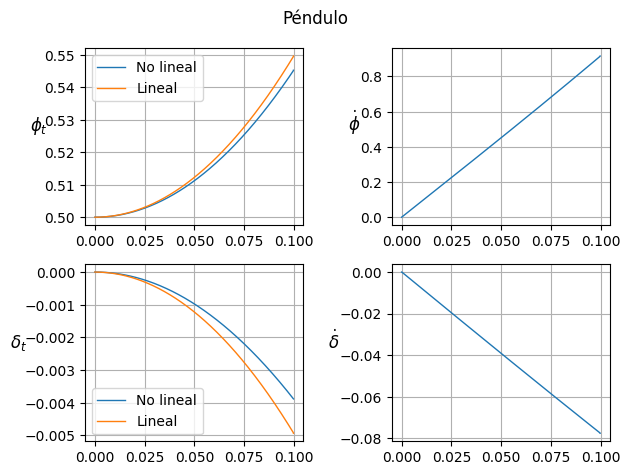

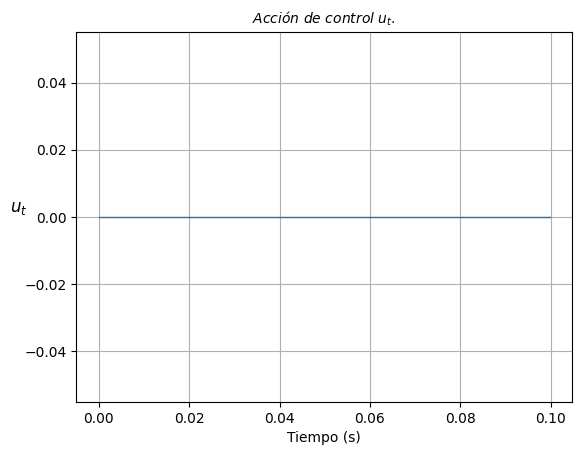

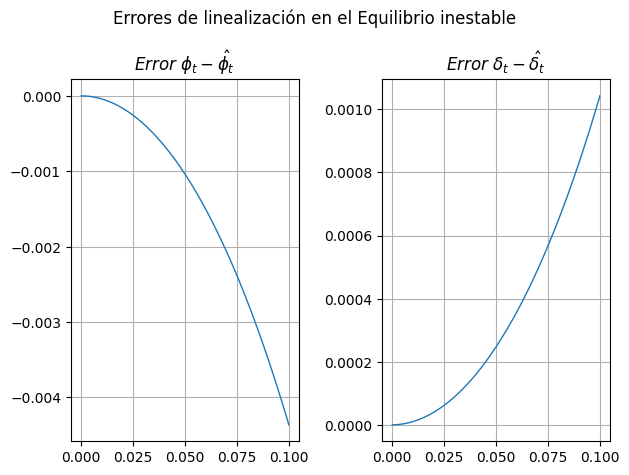

In [ ]:
import numpy as np
import scipy as sp
import scipy.signal
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from pylab import *
from numpy.linalg import eig

m=.1;Fricc=0.1; long=.6;g=9.8;M=.5;
h=1e-4;t_simul=.10; #Tiene que ser muy pequeño para que se vea que coinciden

##%Versión linealizada en el equilibrio inestable. Sontag Pp 104.
##%estado=[p(i); p_p(i); fi(i); omega(i)]
##Mat_A=[0 1 0 0;0 -Fricc/M -m*g/M 0; 0 0 0 1; 0 Fricc/(long*M) g*(m+M)/(long*M) 0];
##Mat_B=[0; 1/M; 0; -1/(long*M)];1
##Mat_C=[1 0 0 0]; %La salida es posición

Mat_A=np.array([[0. ,1. ,0. ,0.],[0.,-Fricc/M, -m*g/M,0.],[0., 0. ,0. ,1.],[0.,Fricc/(long*M) ,g*(m+M)/(long*M), 0.]])
Mat_B=np.array([[0.],[1/M],[0.],[-1./(long*M)]])
Mat_C=np.array([[1., 0., 0., 0.]])

p=np.linspace(0,0,int(t_simul/h))
p_p=np.linspace(0,0,int(t_simul/h))
fi=np.linspace(0,0,int(t_simul/h))
fi_p=np.linspace(0,0,int(t_simul/h))  #
u=np.linspace(0,0,int(t_simul/h))
y=np.linspace(0,0,int(t_simul/h))

y_o=np.linspace(0,0,int(t_simul/h))
p_O=np.linspace(0,0,int(t_simul/h))
fi_O=np.linspace(0,0,int(t_simul/h))
t=np.linspace(0,0,int(t_simul/h))

fi[0]= 0.5
fi_O[0]=fi[0]
fi_pp=0.
u[0]=0.
estado=[[p[0]], [p_p[0]], [fi[0]], [fi_p[0]]]
x_hat=estado #Igual condiciones inicial es del sistema lineal
for ii in range(int(t_simul/h)-1):
    t[ii] = ii*h
    # No lineal
    y[ii]=np.matmul(Mat_C,estado)[0][0] # Mat_C @ estado
    p_pp=(1/(M+m))*(u[ii]-m*long*fi_pp*cos(fi[ii])+(m*long*fi_p[ii]**2)*sin(fi[ii])-Fricc*p_p[ii])
    fi_pp=(1/long)*(g*sin(fi[ii])-p_pp*cos(fi[ii]))
    p_p[ii+1]  = p_p[ii] + h* p_pp
    p[ii+1]    = p[ii] + h * p_p[ii]
    fi_p[ii+1] = fi_p[ii] + h * fi_pp
    fi[ii+1]   = fi[ii] + h * fi_p[ii]
    estado=[[p[ii+1]], [p_p[ii+1]], [fi[ii+1]], [fi_p[ii+1]]]

    # Linealizado
    y_o[ii]=(Mat_C @ x_hat)[0][0] #np.matmul(Mat_C,x_hat)
    x_hatp = np.matmul(Mat_A,x_hat) + Mat_B * u[ii]  # x_hatp = Mat_A @ x_hat + Mat_B * u[ii]
    x_hat = x_hat + h * x_hatp
    p_O[ii+1]=x_hat[0][0]   #El vector inicia en indice 0, en Octave en 1
    fi_O[ii+1]=x_hat[2][0]

    u[ii+1]=0.

t[ii+1] = ii*h
u[ii+1]=0.


fig, axs = plt.subplots(2,2)
fig.suptitle('Péndulo')
axs[0,0].plot(t, fi, linewidth =1.0)
axs[0,0].plot(t, fi_O, linewidth =1.0)
axs[0,0].legend(["No lineal","Lineal"])
axs[0,0].grid( True )
axs[0,0].set_ylabel('$\phi_t$',rotation=0, fontsize=12)
axs[0,1].plot(t, fi_p, linewidth =1.0)
axs[0,1].set_ylabel('$\dot{\phi}$',rotation=0, fontsize=12)
axs[0,1].grid( True )

axs[1,0].plot(t[:-1], p[:-1], linewidth =1.0)  #axs[1,0].plot(t, p, linewidth =1.0)
axs[1,0].plot(t, p_O, linewidth =1.0)
axs[1,0].legend(["No lineal","Lineal"])
axs[1,0].grid( True )
axs[1,0].set_ylabel('$\delta_t$',rotation=0, fontsize=12)
axs[1,1].plot(t, p_p, linewidth =1.0)
axs[1,1].set_ylabel('$\dot{\delta}$',rotation=0, fontsize=12)
axs[1,1].grid( True )
plt.tight_layout() # mantiene separador los gráficos

#Acción de control
fig, ax1 = plt.subplots()
plt.plot(t, u, linewidth =1.0)
plt.grid( True )
ax1.set_ylabel('$u_t$',rotation=0, fontsize=12)
ax1.set_xlabel('Tiempo (s)')
#ax1.set_title(r'$\ddot{o}\acute{e}\grave{e}\hat{O}'
#             r'\breve{i}\bar{A}\tilde{n}\vec{q}$', fontsize=20)
ax1.set_title('$Acción\ de\ control\ u_t.$', fontsize=10)

fig2, axs2 = plt.subplots(1,2)
fig2.suptitle('Errores de linealización en el Equilibrio inestable')
axs2[0].plot(t, fi-fi_O, linewidth =1.0)
axs2[0].grid( True )
axs2[0].set_title('$Error\ \phi_t-\hat{\phi_t}$',rotation=0, fontsize=12)
axs2[1].plot(t, p-p_O, linewidth =1.0)
axs2[1].set_title('$Error\ \delta_t-\hat{\delta_t}$',rotation=0, fontsize=12)
axs2[1].grid( True )
plt.tight_layout() # mantiene separador los gráficos



In [ ]:
import pandas as pd
import plotly.graph_objects as go

df = pd.DataFrame({'t': t.T, 'p': p.T, 'po': p_O.T})
df1 = pd.DataFrame({'t': t.T, 'fi': fi.T, 'fio': fi_O.T})
# últimos 4 valores de la posición
df.tail(4) # t_s=mat.get('t_s')

,t,p,po
996,0.0996,-0.003866,-0.004902
997,0.0997,-0.003874,-0.004912
998,0.0998,-0.003882,-0.004922
999,0.0998,-0.003890,-0.004932


In [ ]:
# últimos 4 valores del angulo fi
df1.tail(4)

,t,fi,fio
996,0.0996,0.544957,0.549293
997,0.0997,0.545049,0.549394
998,0.0998,0.545140,0.549495
999,0.0998,0.545232,0.549596


In [ ]:
#Posición del péndulo
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['t'], y=df['p'], mode='lines', name='No lineal'))
fig.add_trace(go.Scatter(x=df['t'], y=df['po'], mode='lines', name='Lineal'))
# Customize the layout
fig.update_layout(title='Simulación posición del péndulo',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True)
#Ángulo fi del péndulo
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df1['t'], y=df1['fi'], mode='lines', name='No lineal'))
fig1.add_trace(go.Scatter(x=df1['t'], y=df1['fio'], mode='lines', name='Lineal'))
# Customize the layout
fig1.update_layout(title='Simulación ángulo del péndulo',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True)

# Display the interactive Plotly chart
fig.show()
fig1.show()

# **Linealización en el equilibrio estable**

Para el caso de la linealización de sistemas dinámicos, como el péndulo en su equilibrio **estable**, se puede linealizar aplicando Taylor a las ecuaciones cuando $\phi \approx π$



<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot (\pi-\phi) -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} - m\cdot long \cdot \dot{\phi}^2 \cdot (\pi-\phi) -Fricc\cdot \dot{\delta} \\
Long \cdot \ddot{\phi} = -g \cdot (\pi-\phi) - \ddot{\delta}
\end{cases}
\end{equation*}$

en el punto de operación $x=[ \delta,\dot{\delta},\phi,\dot{\phi}]^T$, valuado en $[0,0,\pi,0]^T$.
Primero se trata de despejar las funciones $\ddot{\delta}$ y $\ddot{\phi}$.


In [ ]:
from sympy import *
import numpy as np
init_printing(use_unicode=True)
#syms fi fi_p fi_pp p p_p p_pp M m u long Fricc g;
fi, fi_p, fi_pp, p, p_p, p_pp, M, m, u, long, Fricc, g=symbols('fi fi_p fi_pp p p_p p_pp M m u long Fricc g')
Eq1=Eq(p_pp-(1/(M+m))*(u+m*long*fi_pp+m*long*fi_p**2*(pi-fi)-Fricc*p_p),0)
#% fi_pp=(1/long)*(g*(fi)-p_pp); %Pequeños angulos para fi~0, sin(fi)~fi, cos(fi)~1
Eq2=Eq(fi_pp-(1/long)*(g*(pi-fi)+p_pp),0)
sol = solve((Eq1, Eq2),(p_pp, fi_pp))
# print(sol)
p_pp=sol[p_pp]
fi_pp=sol[fi_pp]
print('p_pp final es')
pretty_print(p_pp)
#display(p_pp)
print('fi_pp final es')
pretty_print(fi_pp)
#display(fi_pp)

p_pp final es
                  2                        2                   
-Fricc⋅pₚ - fi⋅fiₚ ⋅long⋅m - fi⋅g⋅m + π⋅fiₚ ⋅long⋅m + π⋅g⋅m + u
───────────────────────────────────────────────────────────────
                               M                               
fi_pp final es
                                   2                        2                 
-Fricc⋅pₚ - M⋅fi⋅g + π⋅M⋅g - fi⋅fiₚ ⋅long⋅m - fi⋅g⋅m + π⋅fiₚ ⋅long⋅m + π⋅g⋅m +
──────────────────────────────────────────────────────────────────────────────
                                     M⋅long                                   

  
 u
──
  


Así, para el equilibrio **estable**, ambas funciones son:

$\begin{equation*}
\begin{cases}
\ddot{\delta} = \dfrac{-Fricc \cdot \dot{\delta}+(\pi-\phi) \cdot {\dot{\phi}}^2\cdot long\cdot m +(\pi-\phi)\cdot g\cdot m+u}{M} \\
\ddot{\phi} = \dfrac{-Fricc \cdot \dot{\delta}+M \cdot (\pi-\phi) \cdot g+ (\pi-\phi) \cdot{\dot{\phi}}^2\cdot long\cdot m + (\pi-\phi)\cdot g\cdot m+u}{M\cdot long}
\end{cases}
\end{equation*}$


Ahora se procede a realizar las derivadas de las funciones $\ddot{\delta}$ y $\ddot{\phi}$ respecto de las cuatro variables, que son $\delta$, $\dot{\delta}$, $\phi$, y $\ddot{\phi}$.
Se emplea la función diff() y al resultado se lo valúa en el punto de operación mediante la indicación de cada uno con la operación .subs().

In [ ]:
Mat_A=np.array([[0,1,0,0],
  [diff(p_pp, p).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0),
  diff(p_pp, p_p).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0),
  diff(p_pp, fi).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0),
  diff(p_pp, fi_p).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0)],
  [0,0,0,1],
  [diff(fi_pp, p).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0),
  diff(fi_pp, p_p).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0),
  diff(fi_pp, fi).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0),
  diff(fi_pp, fi_p).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0)]])
Mat_B=np.array([[0],
 [diff(p_pp, u).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0)],
 [0],
[diff(fi_pp, u).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0)]])
#print(Mat_A)
#print(Mat_B)
#pretty_print(Mat_A)
#pretty_print(Mat_B)
Ma=simplify(Mat_A)
Mb=simplify(Mat_B)
print('Matriz A:')
display(Ma)
print('\nMatriz B:')
display(Mb)

Matriz A:


⎡0     1         0       0⎤
⎢                         ⎥
⎢   -Fricc     -g⋅m       ⎥
⎢0  ───────    ─────     0⎥
⎢      M         M        ⎥
⎢                         ⎥
⎢0     0         0       1⎥
⎢                         ⎥
⎢   -Fricc   g⋅(-M - m)   ⎥
⎢0  ───────  ──────────  0⎥
⎣    M⋅long    M⋅long     ⎦


Matriz B:


⎡  0   ⎤
⎢      ⎥
⎢  1   ⎥
⎢  ─   ⎥
⎢  M   ⎥
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎢  1   ⎥
⎢──────⎥
⎣M⋅long⎦

# **Simulación numérica para el equilibrio estable**

In [ ]:
import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt
from pylab import *
from numpy.linalg import eig

m=.1;Fricc=0.1; long=.6;g=9.8;M=.5;
h=1e-3;t_simul=10.;

##%Versión linealizada en el equilibrio Estable. Sontag Pp 104.
##%            estado=[p(i); p_p(i); fi(i); omega(i)]
##Mat_A=[0 1 0 0;0 -Fricc/M -m*g/M 0; 0 0 0 1; 0 Fricc/(long*M) g*(m+M)/(long*M) 0];
##Mat_B=[0; 1/M; 0; -1/(long*M)];1
##Mat_C=[1 0 0 0]; %La salida es posición


Mat_A=np.array([[0. ,1. ,0. ,0.],[0.,-Fricc/M, -m*g/M,0.],[0., 0. ,0. ,1.],[0.,-Fricc/(long*M) ,-g*(m+M)/(long*M), 0.]])
Mat_B=np.array([[0.],[1/M],[0.],[1./(long*M)]])
# Mat_C=np.array([[1., 0., 0., 0.],[0, 0., 1., 0.]]) #Para cuando y tiene dos componentes
Mat_C=np.array([[1., 0., 0., 0.]])

fi=np.linspace(0,0,int(t_simul/h))
fi_p=np.linspace(0,0,int(t_simul/h))
p=np.linspace(0,0,int(t_simul/h))
p_p=np.linspace(0,0,int(t_simul/h))
u=np.linspace(0,0,int(t_simul/h))
y=np.linspace(0,0,int(t_simul/h))

y_o=np.linspace(0,0,int(t_simul/h))
p_O=np.linspace(0,0,int(t_simul/h))
p_pO=np.linspace(0,0,int(t_simul/h))
fi_O=np.linspace(0,0,int(t_simul/h))
fi_pO=np.linspace(0,0,int(t_simul/h))

t=np.linspace(0,0,int(t_simul/h))

fi[0]=3.5
fi_pp=0.
u[0]=0.
estado=[[p[0]], [p_p[0]], [fi[0]], [fi_p[0]]]
x_hat=np.array([[0.] ,[0.] ,[fi[0]],[0.]])
xOP=np.array([[0.] ,[0.] ,[pi] ,[0.]])
p_O[0]=x_hat[0][0] #El vector inicia en 0, en Octave en 1
p_pO[0]=x_hat[1][0]
fi_O[0]=x_hat[2][0]
fi_pO[0]=x_hat[3][0]
for ii in range(int(t_simul/h)-1):
    t[ii] = ii*h
    # No lineal
    y[ii]=np.matmul(Mat_C,estado)[0][0]
    p_pp=(1/(M+m))*(u[ii]-m*long*fi_pp*cos(fi[ii])+(m*long*fi_p[ii]**2)*sin(fi[ii])-Fricc*p_p[ii])
    fi_pp=(1/long)*(g*sin(fi[ii])-p_pp*cos(fi[ii]))
    p_p[ii+1]  = p_p[ii] + h * p_pp;
    p[ii+1]    = p[ii] + h * p_p[ii];
    fi_p[ii+1] = fi_p[ii] + h * fi_pp;
    fi[ii+1]   = fi[ii] + h * fi_p[ii];
    estado=[[p[ii+1]], [p_p[ii+1]], [fi[ii+1]], [fi_p[ii+1]]]

    # Linealizado
    y_o[ii]=np.matmul(Mat_C,x_hat)[0][0]  # [0][0], fila y columna de la matriz resultande de la multiplicación
    x_hatp = np.matmul(Mat_A,x_hat-xOP) + Mat_B * u[ii]
    x_hat = x_hat + h * x_hatp
    p_O[ii+1]=x_hat[0][0]  #El vector inicia en indice 0, en Octave en 1
    p_pO[ii+1]=x_hat[1][0]
    fi_O[ii+1]=x_hat[2][0]
    fi_pO[ii+1]=x_hat[3][0]

    u[ii+1]=0. #Para accionar la fuerza

t[ii+1] = ii*h
u[ii+1]=0.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
df = pd.DataFrame({'t': t.T, 'p': p, 'po': p_O.T})
df1 = pd.DataFrame({'t': t.T, 'fi': fi, 'fio': fi_O.T})
df.tail(4) # t_s=mat.get('t_s')


,t,p,po
9996,9.996,0.025360,0.025206
9997,9.997,0.025402,0.025163
9998,9.998,0.025443,0.025119
9999,9.998,0.025484,0.025075


In [ ]:
df1.tail(4) # t_s=mat.get('t_s')

,t,fi,fio
9996,9.996,3.465048,3.464946
9997,9.997,3.465529,3.464557
9998,9.998,3.466004,3.464162
9999,9.998,3.466473,3.463760


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['t'], y=df['p'], mode='lines', name='No lineal'))
fig.add_trace(go.Scatter(x=df['t'], y=df['po'], mode='lines', name='Lineal'))
# Customize the layout
fig.update_layout(title='Simulación posición del péndulo',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True)
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df1['t'], y=df1['fi'], mode='lines', name='No linea'))
fig1.add_trace(go.Scatter(x=df1['t'], y=df1['fio'], mode='lines', name='Lineal'))
# Customize the layout
fig1.update_layout(title='Simulación ángulo del péndulo',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True)
# Display the interactive Plotly chart
fig.show()
fig1.show()

## Suplementos para graficar según normas

### Instala el intérprete Latex para imprimir

In [ ]:
# sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super
!apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

In [ ]:
!pip install SciencePlots # !pip install git+https://github.com/garrettj403/SciencePlots

In [ ]:
import scienceplots

In [ ]:
plt.style.available #tienen que aparecer science y ieee

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'bright',
 'cjk-jp-font',
 'cjk-kr-font',
 'cjk-sc-font',
 'cjk-tc-font',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'grid',
 'high-contrast',
 'high-vis',
 'ieee',
 'latex-sans',
 'light',
 'muted',
 'nature',
 'no-latex',
 'notebook',
 'pgf',
 'retro',
 'russian-font',
 'sans',
 'scatter',
 'science',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'std-colors',
 'tableau-colorblind10',
 'turkish-font',
 'vibrant']

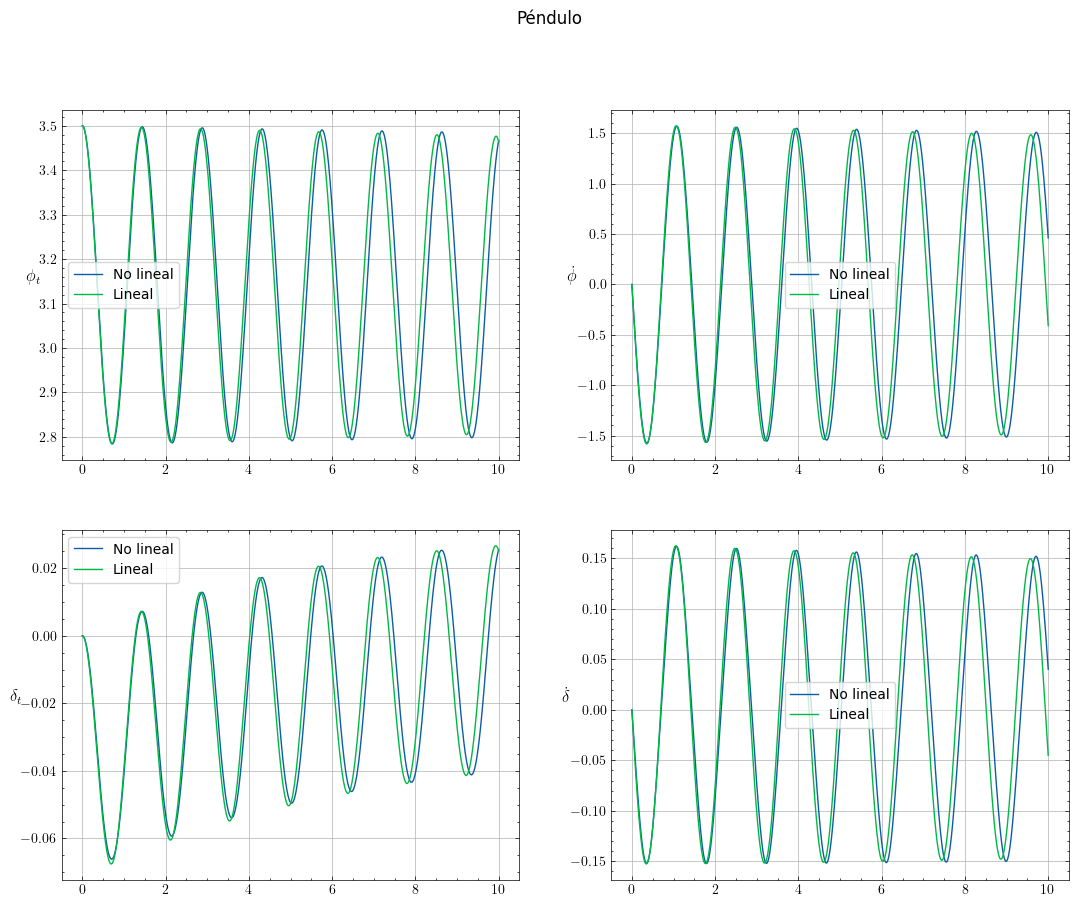

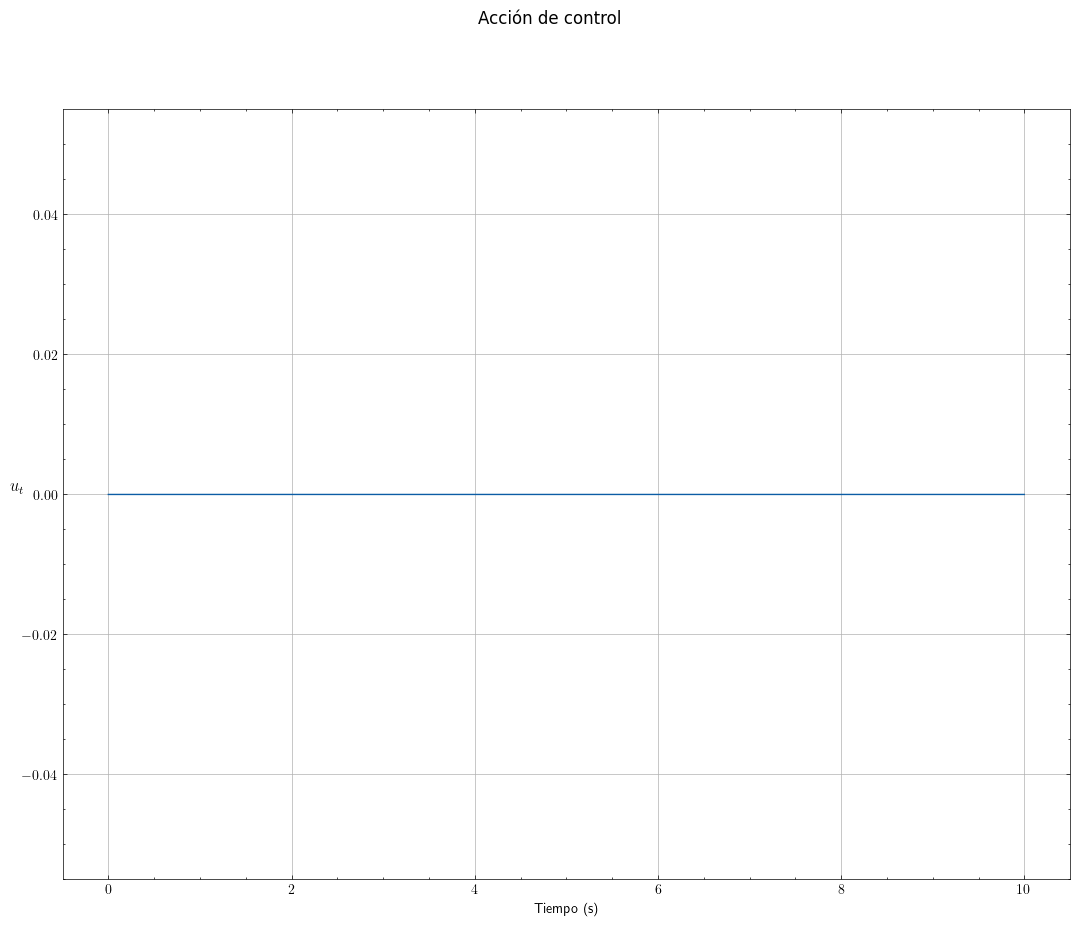

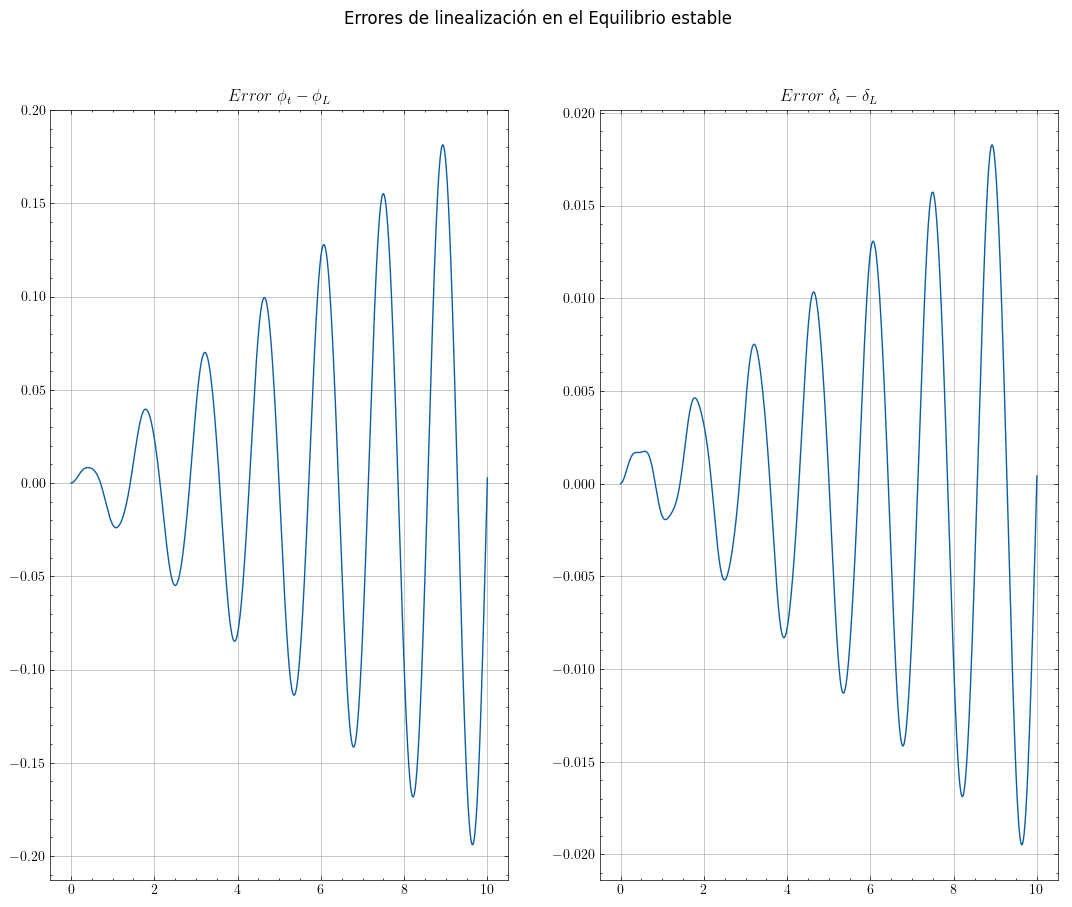

In [ ]:
with plt.style.context('science'):
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
    # plt.figure()
    # plt.plot(x, y)
    # plt.show()
  fig, axs = plt.subplots(2,2,figsize=(13,10), dpi= 100) #fig, axs = plt.subplots(2,NA,figsize=(13,10), dpi= 100)
  fig1, ax1 = plt.subplots(1,1,figsize=(13,10), dpi= 100)
  fig2, axs2 = plt.subplots(1,2,figsize=(13,10), dpi= 100)

fig.suptitle('Péndulo')
axs[0,0].plot(t, fi, linewidth =1.0)
axs[0,0].plot(t, fi_O, linewidth =1.0)
axs[0,0].legend(["No lineal","Lineal"])
axs[0,0].grid( True )
axs[0,0].set_ylabel('$\phi_t$',rotation=0, fontsize=12)
axs[0,1].plot(t, fi_p, linewidth =1.0)   # se cambió el nombre a "omega" por "fi_p"
axs[0,1].plot(t, fi_pO, linewidth =1.0)
axs[0,1].legend(["No lineal","Lineal"])
axs[0,1].set_ylabel('$\dot{\phi}$',rotation=0, fontsize=12)
axs[0,1].grid( True )

axs[1,0].plot(t, p, linewidth =1.0)
axs[1,0].plot(t, p_O, linewidth =1.0)
axs[1,0].legend(["No lineal","Lineal"])
axs[1,0].grid( True )
axs[1,0].set_ylabel('$\delta_t$',rotation=0, fontsize=12)
axs[1,1].plot(t, p_p, linewidth =1.0)
axs[1,1].plot(t, p_pO, linewidth =1.0)
axs[1,1].legend(["No lineal","Lineal"])
axs[1,1].set_ylabel('$\dot{\delta}$',rotation=0, fontsize=12)
axs[1,1].grid( True )

#Acción de control
# fig, ax1 = plt.subplots()
fig1.suptitle('Acción de control')
ax1.plot(t, u, linewidth =1.0)
ax1.grid( True )
ax1.set_ylabel('$u_t$',rotation=0, fontsize=12)
ax1.set_xlabel('Tiempo (s)')
#ax1.set_title(r'$\ddot{o}\acute{e}\grave{e}\hat{O}'
#             r'\breve{i}\bar{A}\tilde{n}\vec{q}$', fontsize=20)
# ax1.set_title(r'$Acción\ de\ control\ u_t.$', fontsize=10)

#
fig2.suptitle('Errores de linealización en el Equilibrio estable')
axs2[0].plot(t, fi-fi_O, linewidth =1.0)
axs2[0].grid( True )
axs2[0].set_title('$Error\ \phi_t-\phi_L$',rotation=0, fontsize=12)
axs2[1].plot(t, p-p_O, linewidth =1.0)
axs2[1].set_title('$Error\ \delta_t-\delta_L$',rotation=0, fontsize=12)
axs2[1].grid( True )

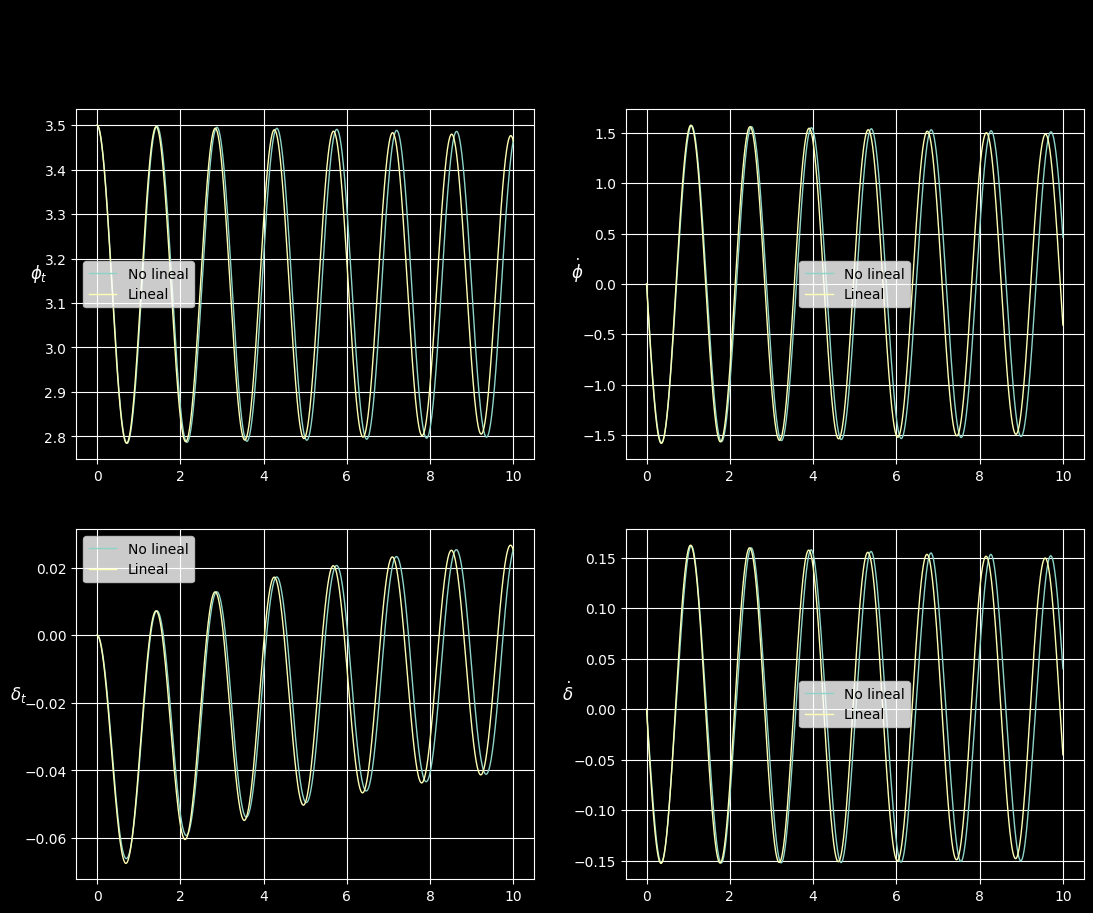

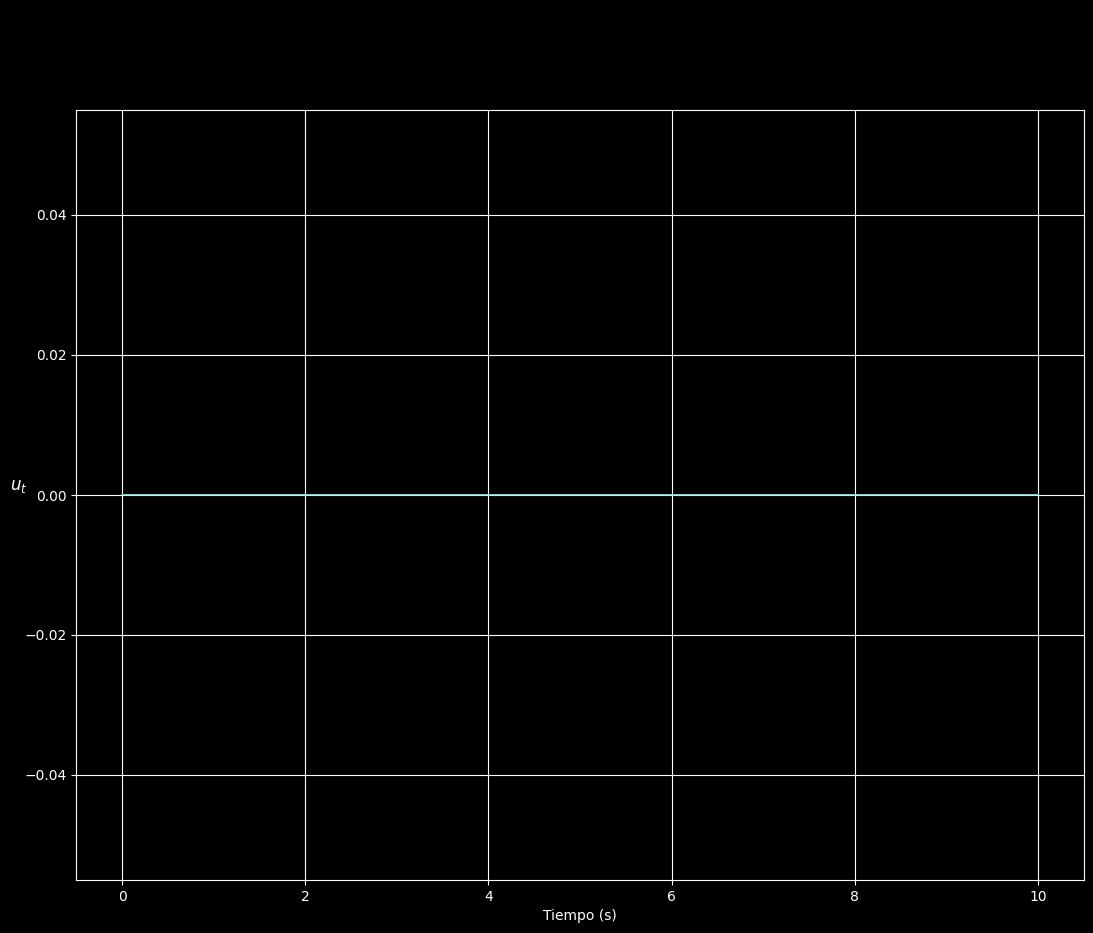

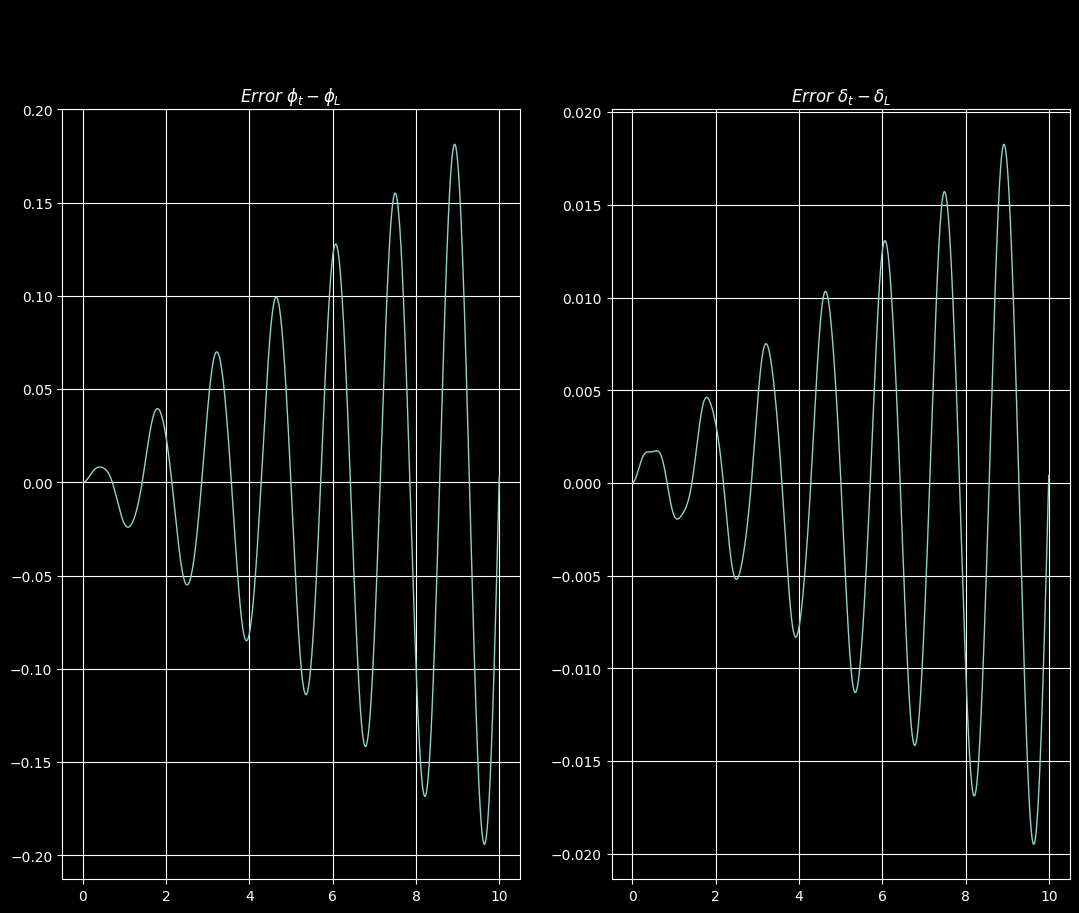

In [ ]:
# with plt.style.context('science'):
with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
    # plt.figure()
    # plt.plot(x, y)
    # plt.show()
  fig, axs = plt.subplots(2,2,figsize=(13,10), dpi= 100) #fig, axs = plt.subplots(2,NA,figsize=(13,10), dpi= 100)
  fig1, ax1 = plt.subplots(1,1,figsize=(13,10), dpi= 100)
  fig2, axs2 = plt.subplots(1,2,figsize=(13,10), dpi= 100)
fig.suptitle('Péndulo')
axs[0,0].plot(t, fi, linewidth =1.0)
axs[0,0].plot(t, fi_O, linewidth =1.0)
axs[0,0].legend(["No lineal","Lineal"])
axs[0,0].grid( True )
axs[0,0].set_ylabel('$\phi_t$',rotation=0, fontsize=12)
axs[0,1].plot(t, fi_p, linewidth =1.0)
axs[0,1].plot(t, fi_pO, linewidth =1.0)
axs[0,1].legend(["No lineal","Lineal"])
axs[0,1].set_ylabel('$\dot{\phi}$',rotation=0, fontsize=12)
axs[0,1].grid( True )

axs[1,0].plot(t, p, linewidth =1.0)
axs[1,0].plot(t, p_O, linewidth =1.0)
axs[1,0].legend(["No lineal","Lineal"])
axs[1,0].grid( True )
axs[1,0].set_ylabel('$\delta_t$',rotation=0, fontsize=12)
axs[1,1].plot(t, p_p, linewidth =1.0)
axs[1,1].plot(t, p_pO, linewidth =1.0)
axs[1,1].legend(["No lineal","Lineal"])
axs[1,1].set_ylabel('$\dot{\delta}$',rotation=0, fontsize=12)
axs[1,1].grid( True )

#Acción de control
# fig, ax1 = plt.subplots()
fig1.suptitle('Acción de control')
ax1.plot(t, u, linewidth =1.0)
ax1.grid( True )
ax1.set_ylabel('$u_t$',rotation=0, fontsize=12)
ax1.set_xlabel('Tiempo (s)')
#ax1.set_title(r'$\ddot{o}\acute{e}\grave{e}\hat{O}'
#             r'\breve{i}\bar{A}\tilde{n}\vec{q}$', fontsize=20)
# ax1.set_title(r'$Acción\ de\ control\ u_t.$', fontsize=10)

#
fig2.suptitle('Errores de linealización en el Equilibrio estable')
axs2[0].plot(t, fi-fi_O, linewidth =1.0)
axs2[0].grid( True )
axs2[0].set_title('$Error\ \phi_t-\phi_L$',rotation=0, fontsize=12)
axs2[1].plot(t, p-p_O, linewidth =1.0)
axs2[1].set_title('$Error\ \delta_t-\delta_L$',rotation=0, fontsize=12)
axs2[1].grid( True )

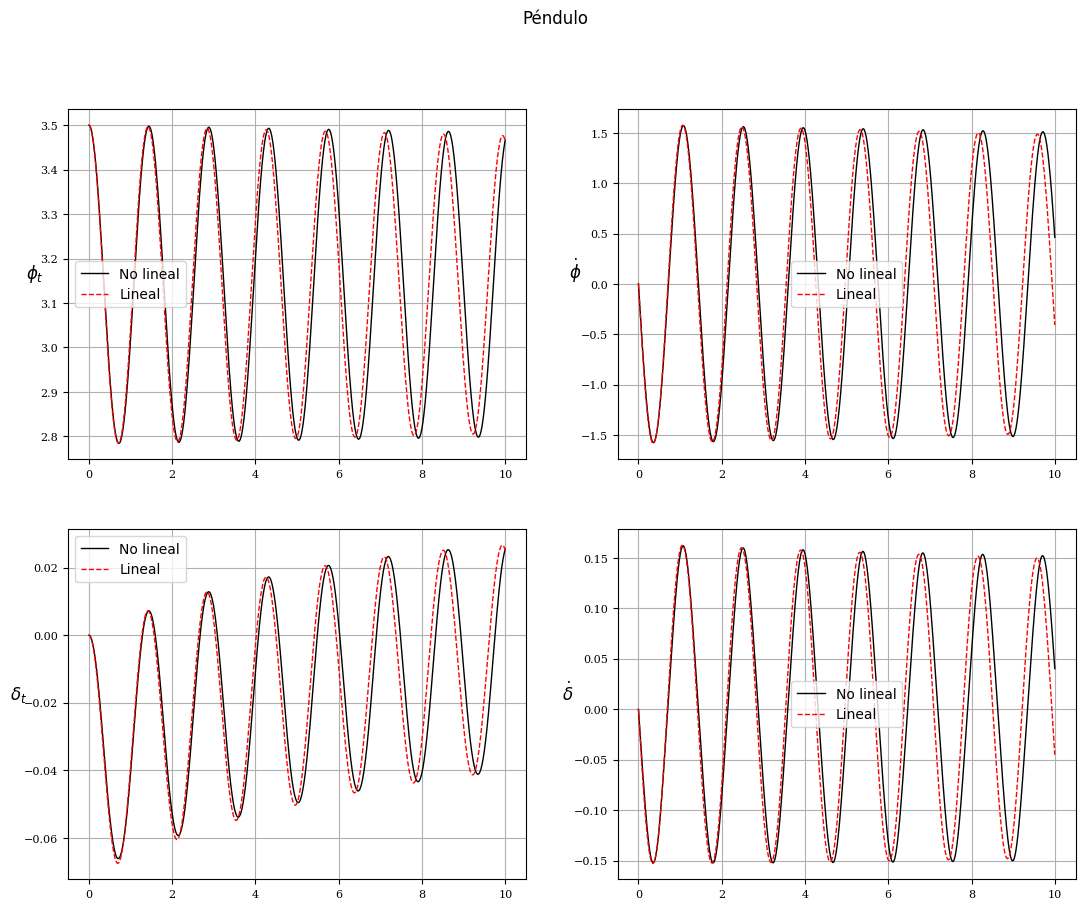

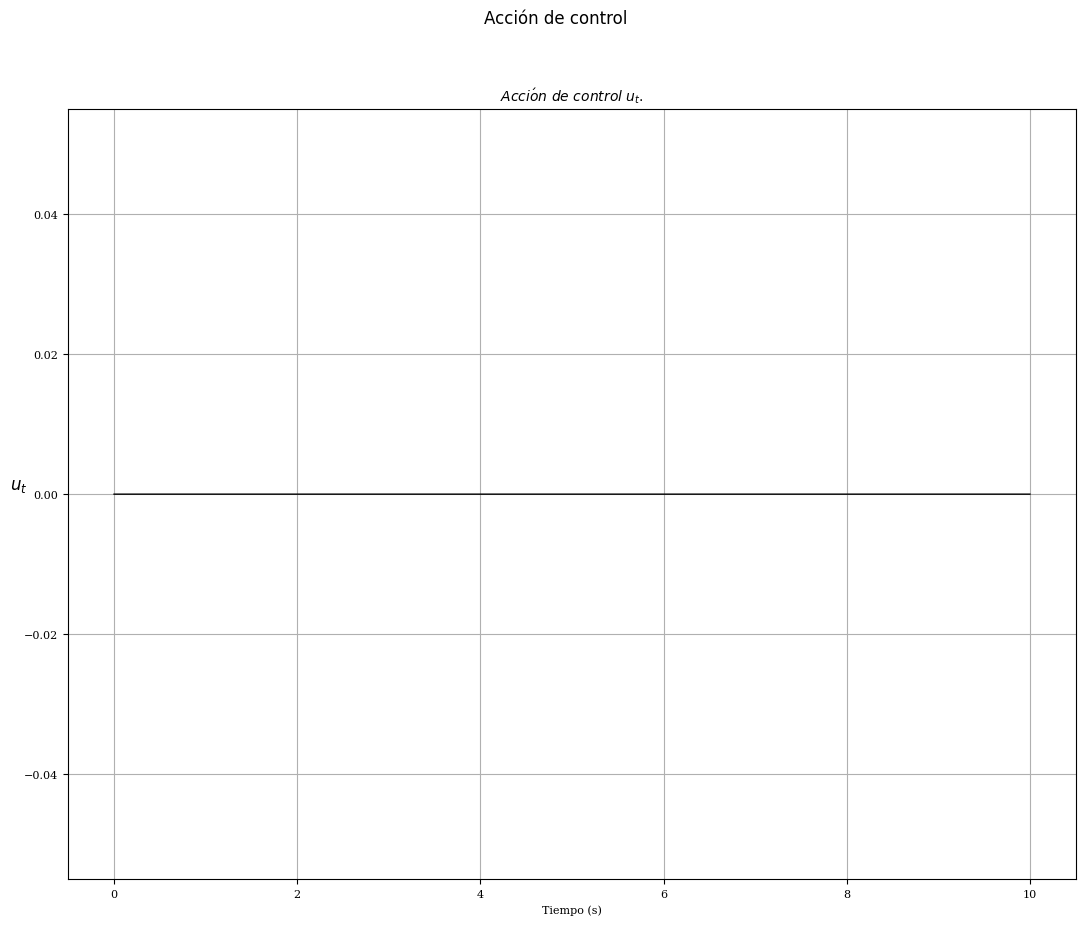

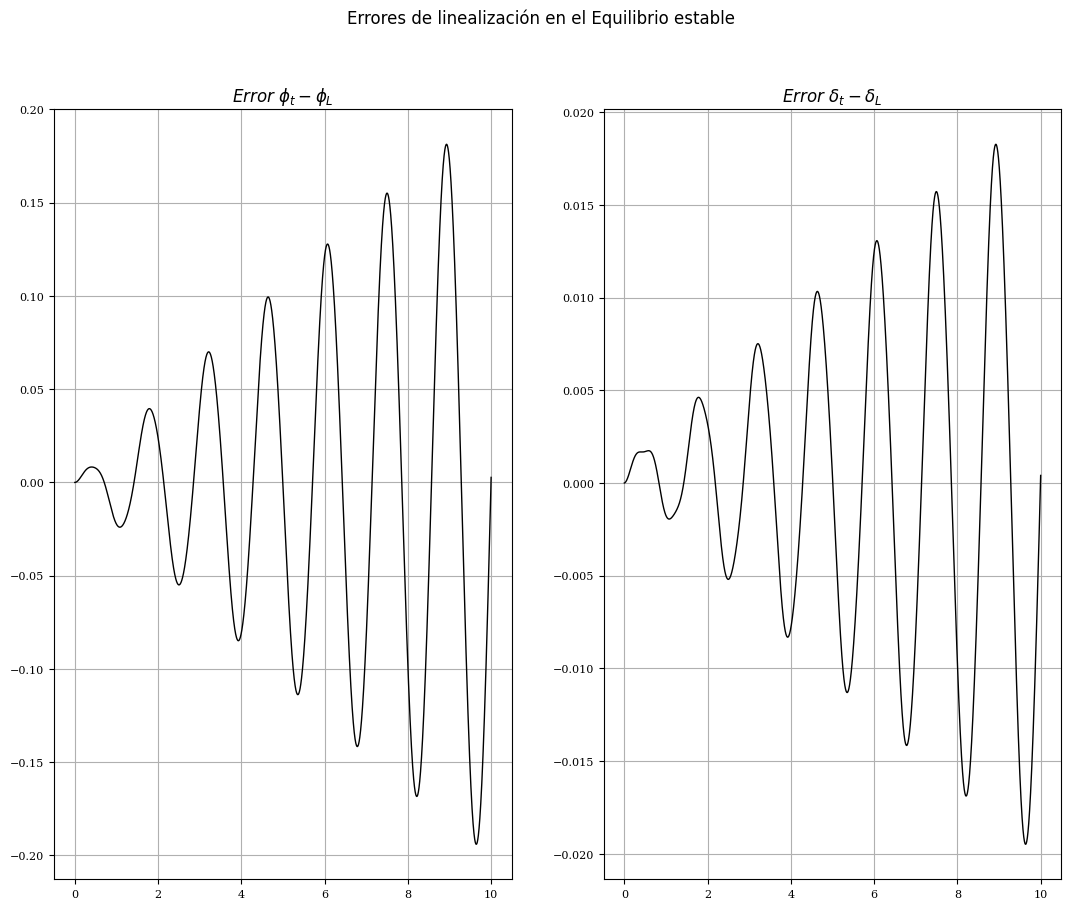

In [ ]:
# with plt.style.context('science'):
# with plt.style.context('dark_background'):
with plt.style.context('ieee'):
# with plt.style.context('seaborn-v0_8-poster'):
    # plt.figure()
    # plt.plot(x, y)
    # plt.show()
  fig, axs = plt.subplots(2,2,figsize=(13,10), dpi= 100) #fig, axs = plt.subplots(2,NA,figsize=(13,10), dpi= 100)
  fig1, ax1 = plt.subplots(1,1,figsize=(13,10), dpi= 100)
  fig2, axs2 = plt.subplots(1,2,figsize=(13,10), dpi= 100)
fig.suptitle('Péndulo')
axs[0,0].plot(t, fi, linewidth =1.0)
axs[0,0].plot(t, fi_O, linewidth =1.0)
axs[0,0].legend(["No lineal","Lineal"])
axs[0,0].grid( True )
axs[0,0].set_ylabel('$\phi_t$',rotation=0, fontsize=12)
axs[0,1].plot(t, fi_p, linewidth =1.0)
axs[0,1].plot(t, fi_pO, linewidth =1.0)
axs[0,1].legend(["No lineal","Lineal"])
axs[0,1].set_ylabel('$\dot{\phi}$',rotation=0, fontsize=12)
axs[0,1].grid( True )

axs[1,0].plot(t, p, linewidth =1.0)
axs[1,0].plot(t, p_O, linewidth =1.0)
axs[1,0].legend(["No lineal","Lineal"])
axs[1,0].grid( True )
axs[1,0].set_ylabel('$\delta_t$',rotation=0, fontsize=12)
axs[1,1].plot(t, p_p, linewidth =1.0)
axs[1,1].plot(t, p_pO, linewidth =1.0)
axs[1,1].legend(["No lineal","Lineal"])
axs[1,1].set_ylabel('$\dot{\delta}$',rotation=0, fontsize=12)
axs[1,1].grid( True )

#Acción de control
# fig, ax1 = plt.subplots()
fig1.suptitle('Acción de control')
ax1.plot(t, u, linewidth =1.0)
ax1.grid( True )
ax1.set_ylabel('$u_t$',rotation=0, fontsize=12)
ax1.set_xlabel('Tiempo (s)')
#ax1.set_title(r'$\ddot{o}\acute{e}\grave{e}\hat{O}'
#             r'\breve{i}\bar{A}\tilde{n}\vec{q}$', fontsize=20)
ax1.set_title(r'$Acci \'o n\ de\ control\ u_t.$', fontsize=10)
#
fig2.suptitle('Errores de linealización en el Equilibrio estable')
axs2[0].plot(t, fi-fi_O, linewidth =1.0)
axs2[0].grid( True )
axs2[0].set_title('$Error\ \phi_t-\phi_L$',rotation=0, fontsize=12)
axs2[1].plot(t, p-p_O, linewidth =1.0)
axs2[1].set_title('$Error\ \delta_t-\delta_L$',rotation=0, fontsize=12)
axs2[1].grid( True )
  #  warnings.filterwarnings("ignore", category=DeprecationWarning)

# Cierre


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')